

### **1.0 Process Fundamentals**

#### **1.1 Program vs. Process**

**Question:** What is the difference between a program and a process?

**Answer:** A program is a passive entity, consisting of a set of instructions stored on disk (an executable file). A process is an active entity, which is an instance of a program that is being executed. A process includes the program code, along with the current activity (program counter, stack, registers) and the resources allocated to it.

#### **1.2 Process Memory Sections**

**Question:** What sections is a process in memory composed of?

**Answer:** A process in memory is typically composed of the following sections:
1.  **Text Section:** The executable code of the program.
2.  **Data Section:** Contains global and static variables.
3.  **Heap Section:** Dynamically allocated memory during runtime.
4.  **Stack Section:** Contains temporary data such as function parameters, return addresses, and local variables.

#### **1.3 Size Differences of Process Sections**

**Question:** How do the sizes of the different sections of a process differ from each other?

**Answer:**
*   The **Text** section is fixed in size upon compilation.
*   The **Data** section has a fixed size for initialized and uninitialized variables.
*   The **Heap** section is dynamic and can grow and shrink during execution (e.g., with `malloc` and `free`).
*   The **Stack** section is also dynamic, growing with each function call and shrinking with each return. The stack and heap grow towards each other within the process address space.

#### **1.4 Process States**

**Question:** Name the different states of a process.

**Answer:** The basic states of a process are:
1.  **New:** The process is being created.
2.  **Running:** Instructions are being executed.
3.  **Waiting (or Blocked):** The process is waiting for some event to occur (e.g., I/O completion).
4.  **Ready:** The process is loaded in memory and waiting to be assigned to a CPU.
5.  **Terminated:** The process has finished execution.

#### **1.5 Process State Transitions**

**Question:** What are the conditions for transitions between the different process states?

**Answer:**
*   **New -> Ready:** The operating system is finished loading the process into memory.
*   **Ready -> Running:** The CPU scheduler dispatches the process.
*   **Running -> Terminated:** The process finishes its execution or is explicitly killed.
*   **Running -> Ready:** An interrupt occurs, such as a timer expiry (for preemptive scheduling).
*   **Running -> Waiting:** The process requests an event it must wait for, like an I/O operation.
*   **Waiting -> Ready:** The event the process was waiting for (e.g., I/O completion) occurs.

### **2.0 Process Control and Scheduling**

#### **2.1 Purpose of the PCB**

**Question:** What is the use of the PCB (Process Control Block)?

**Answer:** The PCB is a data structure in the operating system kernel that represents a process. Its purpose is to store all the information needed to describe and manage a process, allowing the OS to suspend a process (e.g., during a context switch) and later resume it exactly where it left off.

#### **2.2 PCB Contents**

**Question:** What information is stored in the PCB?

**Answer:** The PCB typically contains:
*   **Process State:** (e.g., running, waiting, ready).
*   **Program Counter:** The address of the next instruction to execute.
*   **CPU Registers:** The contents of all processor registers.
*   **CPU-Scheduling Information:** Such as process priority.
*   **Memory-Management Information:** (e.g., base and limit registers, page tables).
*   **Accounting Information:** (e.g., CPU time used, time limits).
*   **I/O Status Information:** (e.g., list of open I/O devices, allocated files).

#### **2.3 Role of the Process Scheduler**

**Question:** What is the role of the process scheduler?

**Answer:** The process scheduler selects an available process (from the ready queue) for program execution on the CPU. Its main role is to manage and coordinate the order in which processes access the CPU to maximize utilization and provide a responsive multi-tasking environment.

#### **2.4 Degree of Multiprogramming**

**Question:** What is meant by the degree of multiprogramming?

**Answer:** The degree of multiprogramming refers to the number of processes that are present in memory at the same time and are capable of executing (i.e., are in the ready or running state). A higher degree of multiprogramming can increase CPU utilization by ensuring there is almost always a process ready to run.

#### **2.5 CPU-bound vs. I/O-bound Processes**

**Question:** What is the difference between CPU-bound and I/O-bound processes?

**Answer:**
*   A **CPU-bound process** spends most of its time performing computations and uses the CPU for long periods. It has few long I/O waits (e.g., scientific calculations).
*   An **I/O-bound process** spends most of its time waiting for input/output operations to complete. It uses the CPU for short bursts before issuing an I/O request (e.g., a program that frequently interacts with a user or reads from disk). A well-balanced system has a mix of both types of processes.



### **3.0 Process Lifecycle & Operations**

#### **3.1 Process Lifecycle**

**Question:** According to the following diagram, explain what process a thread goes through from its creation until its end? (Note: A standard process state diagram is assumed).





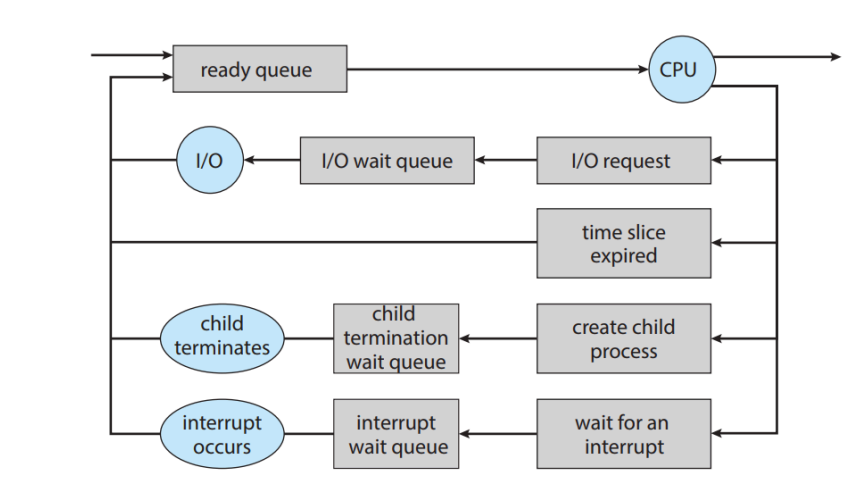









**Answer:** A process typically goes through the following states:
1.  **New:** The process is first created.
2.  **Ready:** After creation, it is loaded into memory and waits in the ready queue to be assigned to the CPU.
3.  **Running:** When selected by the short-term scheduler, it executes its instructions on the CPU.
4.  It can then cycle between **Running**, **Ready** (e.g., when interrupted), and **Waiting/Blocked** (if it requires an I/O operation).
5.  Once its execution is finished or it is terminated, it enters the **Terminated** state, and its resources are deallocated.

#### **3.2 Swapping in Process Scheduling**

**Question:** What is meant by Swapping in process scheduling?

**Answer:** Swapping is a technique where a process can be temporarily moved (swapped) out of main memory into a backing store (like a disk) and then brought back into memory to continue execution. This is done to free up memory for other processes and allows the degree of multiprogramming to be increased beyond the physical memory limit.

#### **3.3 Context Switching**

**Question:** How is a context switch performed?

**Answer:** A context switch is performed by the operating system kernel to switch the CPU from one process to another. The steps are:
1.  Save the state of the currently running process (its PCB, including the program counter, registers, etc.) into its Process Control Block (PCB).
2.  Load the saved state of the next process to run from its PCB into the CPU registers.
3.  Update memory management data structures and caches as needed.
4.  Resume execution of the new process using its loaded program counter.

#### **3.4 Variability of Context Switch Cost**

**Question:** Is the cost of a context switch the same everywhere? If not, what factors lead to this difference?

**Answer:** No, the cost of a context switch is not uniform. Factors that influence its cost include:
*   **Hardware Support:** The speed of memory access and specialized instructions for saving/loading state.
*   **CPU Complexity:** The number of registers and the amount of state data that must be saved and restored.
*   **TLB and Cache Overhead:** If the new process has a different memory map, the TLB (Translation Lookaside Buffer) may need to be flushed, and the CPU cache may have a high miss rate initially, which is very costly.

### **4.0 Process Creation and Execution**

#### **4.1 Process Resource Needs**

**Question:** What resources does a process need after its creation? How are these resources assigned to it?

**Answer:** After creation, a process typically needs:
*   CPU time
*   Memory space (for code, data, heap, stack)
*   Access to I/O devices and files
These resources are assigned by the operating system. When a process is created, the OS allocates a PCB, memory space, and may provide initial access to resources. During its life, the process requests more resources (e.g., via system calls), which the OS grants based on availability and scheduling policies.

#### **4.2 Execution States after Fork**

**Question:** When one process creates another process, what execution states can be envisioned for it? What execution states will the child process have?

**Answer:**
*   **Parent Process States:** After the `fork()` system call, the parent process can either continue executing concurrently with the child or it can `wait()` for the child to terminate. Thus, it can be in the **Running**, **Ready**, or **Blocked** (waiting) state.
*   **Child Process States:** The child process begins its life in the **Ready** state, waiting to be scheduled. It will then transition to the **Running** state when dispatched by the CPU scheduler, and may also enter the **Blocked** state if it performs I/O.

#### **4.3 Fork vs. Exec**

**Question:** What is the difference between the `fork` and `exec` commands?

**Answer:**
*   **`fork()`:** Creates a new process. The new (child) process is an almost identical duplicate of the calling (parent) process. It has its own copy of the parent's memory space and file descriptors. `fork()` is used to create a new process, not to run a new program.
*   **`exec()`:** Replaces the current process's memory space (text, data, heap, stack) with a brand new program from an executable file. The Process ID (PID) remains the same, but the program that the process is executing changes completely. `exec()` is used to run a new program within an existing process. They are often used together: `fork()` creates a new process, and `exec()` loads the new program into that process.



### **5.0 Process Termination**

#### **5.1 Process Termination States**

**Question:** What are the different ways a process can terminate?

**Answer:** A process can terminate under the following circumstances:
1.  **Voluntary Normal Exit:** The process executes an exit system call, having finished its work.
2.  **Voluntary Error Exit:** The process detects an error (e.g., incorrect command-line arguments) and chooses to exit.
3.  **Involuntary Error Exit:** A fatal error occurs during execution (e.g., a segmentation fault, division by zero).
4.  **Killed by Another Process:** Another process (e.g., a parent or a user via the `kill` command) terminates it.

#### **5.2 Parent-Terminating Child**

**Question:** For what reason might a parent process terminate its child's execution?

**Answer:** A parent process might terminate a child for several reasons:
*   The task assigned to the child is no longer required.
*   The user requested the operation to be canceled.
*   The parent is exiting itself, and the operating system does not allow child processes to continue without their parent (termination cascading).
*   The child has exceeded its allocated resource usage.

#### **5.3 Termination Cascading**

**Question:** What is meant by the concept of "Termination Cascading"?

**Answer:** Termination Cascading occurs when a parent process terminates, causing all of its child processes to be terminated as well. This is typically done by the operating system to prevent child processes from becoming orphaned and continuing to run without a managing parent. In some systems, this cascade can continue recursively, terminating the entire process subtree.

#### **5.4 Removal from Process Table**

**Question:** When is a terminated process removed from the process table?

**Answer:** A terminated process is not immediately removed from the process table. It enters a "Zombie" state and remains in the table until its parent process reads its exit status using the `wait()` system call. After the parent collects this status, the process's entry and PCB are finally deallocated and removed from the process table.

### **6.0 Special Process States & Android**

#### **6.1 Zombie Process**

**Question:** What is a Zombie process?

**Answer:** A Zombie process is a process that has finished execution (terminated) but still has an entry in the process table. It exists so that its parent process can read its exit status. The process is "dead" and consumes no CPU or memory resources, but its Process ID (PID) is still reserved. It is cleared when the parent calls `wait()`.

#### **6.2 Orphan Process & OS Solution**

**Question:** What is an Orphan process? What is the operating system's solution for dealing with it?

**Answer:** An Orphan process is a child process whose parent has terminated without waiting for it. The OS solution is to "re-parent" the orphaned process, making the `init` (or `systemd`) process (with PID 1) its new parent. The `init` process periodically calls `wait()`, which eventually cleans up the orphan when it terminates, preventing it from becoming a permanent zombie.

#### **6.3 Process Termination in Android**

**Question:** In the Android OS, due to resource constraints, the OS may sometimes be forced to terminate some processes. How is this done?

**Answer:** Android's Low Memory Killer (LMK) daemon terminates processes to free up memory. It does this based on a hierarchy of process states (or importance levels):
1.  **Empty/Background Processes:** Killed first.
2.  **Service/Visible Processes:** Killed next if more memory is needed.
3.  **Foreground Process (User-active app):** Killed only as a last resort.
The process with the lowest "importance" level is terminated first.

### **7.0 Process Cooperation & Communication**

#### **7.1 Independent vs. Cooperative Processes**

**Question:** Examine processes from the two perspectives of Cooperative and Independent.

**Answer:**
*   **Independent Processes:** Cannot affect or be affected by other processes. They do not share data with other processes and are deterministic (the same input always produces the same output).
*   **Cooperative Processes:** Can affect or be affected by other processes. They share data and are non-deterministic, as their execution speed may depend on the actions of other processes.

#### **7.2 Advantages of Cooperative Processes**

**Question:** What are the advantages of cooperative processes for the execution environment?

**Answer:**
*   **Information Sharing:** Multiple processes may need access to the same data.
*   **Computation Speedup:** A task can be broken into subtasks that run concurrently on multiple CPUs/cores.
*   **Modularity:** Dividing system functions into separate processes is good for software architecture.
*   **Convenience:** A single user may wish to run multiple tasks simultaneously (e.g., editing, compiling, printing).

#### **7.3 Interprocess Communication (IPC) Models**

**Question:** Name the types of models for communication between processes.

**Answer:** The two fundamental models are:
1.  **Shared Memory:** Processes read and write to a common region of memory.
2.  **Message Passing:** Processes exchange messages through an communication channel provided by the OS.

#### **7.4 Shared Memory vs. Message Passing**

**Question:** What can be said about the differences between Shared Memory and Message Passing?

**Answer:**
*   **Shared Memory is Faster:** Once the shared region is established, communication happens at memory speed, without needing kernel intervention for each access.
*   **Message Passing is Simpler and Safer:** It avoids the complex synchronization required to protect shared memory from concurrent access and is less prone to errors since processes don't have direct access to each other's address space.

#### **7.5 Bounded vs. Unbuffered Communication**

**Question:** Explain the difference between bounded and unbounded capacity in interprocess communication.

**Answer:** This refers to the queue of messages in a message-passing system.
*   **Bounded Capacity:** The queue has a finite length. If the queue is full, the sender must be blocked until space is available. This provides a natural form of flow control.
*   **Unbounded Capacity:** The queue has a theoretically infinite length. The sender never needs to block when sending a message, but this risks consuming unlimited system memory if the receiver is slower than the sender.


### **8.0 Message Passing & IPC Mechanisms**

#### **8.1 Messages vs. Buffering Condition**

**Question:** Using messages instead of a buffer for communication between two processes eliminates which condition for using a buffer?

**Answer:** It eliminates the need for the processes to **synchronize their access to the shared buffer**. In message passing, the operating system handles the queuing and delivery of messages, so the sender and receiver do not need to use semaphores or other locks to coordinate access to a shared data structure, thus avoiding the complexity of synchronization.

#### **8.2 Problem with Direct Communication**

**Question:** What is the fundamental problem with direct communication between processes?

**Answer:** The fundamental problem is **reduced modularity and tight coupling**. In direct communication, processes must explicitly name each other (e.g., `send(P, message)`). This creates a hard-coded dependency; if one process's identifier changes, the other must be modified and recompiled, making the system less flexible and more difficult to maintain.

#### **8.3 Rendezvous Concept**

**Question:** Explain the concept of "Rendezvous" in the context of message passing.

**Answer:** Rendezvous is a form of synchronous message passing where both the sender and the receiver must block until the message is exchanged. Neither the `send()` nor the `receive()` operation completes until the other process has reached the corresponding point. It is a "meeting point" where the data transfer occurs, ensuring tight synchronization between the processes.

#### **8.4 Zero Capacity Buffer**

**Question:** In message passing, what does "Buffer Capacity Zero" mean?

**Answer:** A buffer capacity of zero means there is no message queue. This forces **synchronous communication (rendezvous)**. The sender must block until the receiver is ready to accept the message directly. There is no buffering; the message is handed off directly from the sender to the receiver.

### **9.0 IPC in Mach and Windows**

#### **9.1 Ports in the Mach OS**

**Question:** How do ports work in the Mach operating system?

**Answer:** In Mach, a port is a protected, kernel-managed message queue. It is the fundamental communication channel. Each port has a single receiver but can have multiple senders. Processes send messages to a port by possessing a "send right" and receive messages from it by possessing a "receive right." The kernel manages these rights and delivers messages to the receiver.

#### **9.2 Task-Kernel Communication in Mach**

**Question:** In the Mach OS, how does a task communicate with the kernel?

**Answer:** A task (process) communicates with the Mach kernel via message passing through special kernel ports. The task sends requests (system calls) as messages to these kernel ports, and the kernel sends replies back to the task's reply port. This design unifies all system interactions under a single IPC mechanism.

#### **9.3 Mach Message Structure**

**Question:** What components does a message in the Mach OS have? What is the difference between Simple and Complex messages?

**Answer:** A Mach message consists of a header and a body.
*   **Simple Messages:** Contain only pure data within the message body (e.g., integers).
*   **Complex Messages:** Can contain "out-of-line" data, which are pointers to actual memory regions. This allows for efficient transfer of large data blocks without copying, as the kernel can remap the physical memory pages from the sender's address space to the receiver's.

#### **9.4 Connection vs. Communication Ports in Windows**

**Question:** What is the difference between Connection Ports and Communication Ports in Windows?

**Answer:** In Windows ALPC (Advanced Local Procedure Call):
*   **Connection Port:** A well-known port used by a server to listen for incoming connection requests from clients. It is used only to establish a communication channel.
*   **Communication Port:** A private, dedicated port pair (one for client->server, one for server->client) created after a successful connection. All subsequent message exchange between the specific client and server happens over this communication port.

#### **9.5 Windows ALPC Message Techniques**

**Question:** What are the three message-passing techniques when creating an ALPC channel in Windows?

**Answer:**
1.  **Passing Messages through the LPC Data Copy Method:** The message is copied from the sender's address space to a kernel buffer, then to the receiver's address space.
2.  **Passing Messages as Section Objects (Shared Memory):** A region of shared memory is mapped into both the client and server processes for high-bandwidth data transfer.
3.  **Passing Messages by Reference (Quick LPC):** Used when the client and server are in the same address space, allowing pointers to be passed directly without copying.

### **10.0 Pipes in UNIX and Windows**

#### **10.1 Pipes in UNIX**

**Question:** Describe the pipe in the UNIX operating system.

**Answer:** A pipe in UNIX is a unidirectional interprocess communication channel. It is created by the `pipe()` system call, which returns two file descriptors: one for the read end and one for the write end. Data written to the write end can be read from the read end in a first-in, first-out (FIFO) manner. Pipes are commonly used to connect the standard output of one process to the standard input of another in a shell pipeline (e.g., `ls | grep "file"`).

#### **10.2 Simple Pipes and Windows Equivalent**

**Question:** What is a simple pipe in UNIX? What is the Windows equivalent of this structure?

**Answer:**
*   **Simple Pipe (Anonymous Pipe):** A UNIX pipe created with `pipe()` that is unnamed and can only be used by related processes (e.g., parent and child).
*   **Windows Equivalent:** Windows provides **Anonymous Pipes** with very similar functionality, primarily used for communication between a parent and child process or for redirecting standard input/output.

#### **10.3 Pipe Inheritance: Windows vs. UNIX**

**Question:** Compare the behavior of Windows and UNIX operating systems regarding pipe handle inheritance.

**Answer:**
*   **UNIX:** By default, after a `fork()`, the child process inherits copies of all open file descriptors, including pipes. This allows easy communication between parent and child.
*   **Windows:** By default, a child process does **not** inherit pipe handles (or most other handles) from its parent. The parent must explicitly specify which handles are inheritable when creating the child process. This is a security feature in Windows to prevent unintended access to resources.


### **11.0 Code Analysis & Advanced IPC**

#### **11.1 Code Analysis**

**Question:** Review the following code snippet for execution correctness.
```cpp
 int main() {
 int fds[2];
 pipe(fds);
 pid_t pid = fork();
 if (pid == 0) {
 close(fds[1]);
 close(fds[0]);
 exit(0);
 } else {
 close(fds[1]);
 char *buf = NULL;
 int n = read(fds[0], buf, 10);
 buf[0] = 'A';
 close(fds[0]);
 }
 return 0;
}
```





**Answer:** The code contains several critical errors:
1.  **In the Child Process:** `close(fds[0]);` closes the read end. This is correct but pointless as the child immediately exits.
2.  **In the Parent Process:**
    *   `char *buf = NULL;` declares a pointer but does not allocate memory for it.
    *   `int n = read(fds[0], buf, 10);` attempts to read 10 bytes into the memory location `NULL`. This will cause a **segmentation fault**.
    *   `buf[0] = 'A';` is also invalid because `buf` is still `NULL`. Even if the read succeeded, this line would be unsafe without checking the return value `n`.

**Conclusion:** The code is incorrect and will crash.

#### **11.2 Named Pipes vs. Simple Pipes**

**Question:** What is the difference between a Named Pipe and a Simple Pipe?

**Answer:**
*   **Simple Pipe (Anonymous Pipe):** Unnamed, can only be used by related processes (e.g., parent and child) that inherit the file descriptors. It exists only in memory and is temporary.
*   **Named Pipe (FIFO):** Has a filename in the filesystem. Unrelated processes can open it for communication by using its name. It persists until it is deleted from the filesystem.

### **12.0 Sockets and RPC**

#### **12.1 Sockets**

**Question:** What is a socket?

**Answer:** A socket is an endpoint for two-way communication between processes over a network. It is identified by an IP address and a port number. Sockets provide a generalized interface that allows processes on the same or different machines to communicate.

#### **12.2 Java Socket Types**

**Question:** Name the types of Java sockets.

**Answer:** The core Java socket types in the `java.net` package are:
1.  **`Socket`:** Used for TCP communication (connection-oriented, reliable).
2.  **`ServerSocket`:** Used by TCP servers to listen for incoming client connections.
3.  **`DatagramSocket`:** Used for UDP communication (connectionless, unreliable).

#### **12.3 TCP Socket Operation**

**Question:** Explain how a TCP socket works in a server-client communication from the operating system's perspective.

**Answer:**
1.  **Server:** Creates a socket, `bind`s it to a specific port, and `listen`s for incoming connections.
2.  **Client:** Creates a socket and `connect`s to the server's IP and port.
3.  **OS/Three-Way Handshake:** The client and server operating systems exchange SYN, SYN-ACK, and ACK packets to establish a reliable connection.
4.  **Server `accept`:** The server's OS completes the connection, and the `accept()` call returns a new socket for dedicated communication with that client.
5.  **Data Transfer:** Both sides use `send`/`write` and `receive`/`read` system calls. The OS handles packetizing data, ensuring reliability, and managing flow control.
6.  **Connection Termination:** A similar handshake (FIN packets) closes the connection, and the OS deallocates the socket resources.

#### **12.4 Multiple Services with RPC**

**Question:** In RPC communication, how is a server able to execute different services with a single fixed address?

**Answer:** The fixed address is for the **RPC daemon** (like `portmapper` on Unix). This daemon listens on a well-known port. When a server starts, it registers each service (e.g., "NFS", "NIS") and its dynamic port number with the daemon. A client first contacts the daemon at the fixed address, requests the port for a specific service, and then communicates directly with the server on that dynamic port.

#### **12.5 Stubs**

**Question:** Define a Stub. In which communication strategy between Client and Server are they used? Describe their role in this communication.

**Answer:**
*   **Definition:** A stub is a piece of code that acts as a local proxy for a remote procedure.
*   **Usage:** They are used in **Remote Procedure Call (RPC)**.
*   **Role:**
    *   **Client Stub:** Appears to the client as the actual remote procedure. It marshals the parameters into a message and sends it to the server. It then waits for the reply, unmarshals it, and returns the result to the client.
    *   **Server Stub:** Appears to the server as the calling client. It receives the message, unmarshals the parameters, calls the actual local procedure, marshals the return value, and sends it back to the client.

#### **12.6 Marshaling and Serializing**

**Question:** Explain Marshaling and Serializing.

**Answer:**
*   **Serializing:** The process of converting a data structure or object state into a format (e.g., a byte stream) that can be stored or transmitted. It focuses on the data itself.
*   **Marshaling:** Similar to serializing, but it may also include transforming the data's representation (e.g., converting between big-endian and little-endian) and codebase information. In RPC, marshaling is the specific process of packaging parameters for transmission over a network.

### **13.0 RPC and Android Services**

#### **13.1 Role of the Matchmaker**

**Question:** What is the role of the Matchmaker in RPC? What is the difference between implementing an RPC service with a Daemon on the same machine as the requester versus on a remote machine?

**Answer:**
*   **Role of Matchmaker:** The Matchmaker (or binder) is a service that connects a client to a server. It knows the locations of available services. A client queries the matchmaker to find a server that can fulfill its request.
*   **Local vs. Remote Daemon:**
    *   **Local Machine:** Communication is very fast (inter-process communication within one OS) and more secure from external network threats.
    *   **Remote Machine:** Allows for resource sharing and distributing workload across a network but introduces latency, potential network failures, and security concerns.

#### **13.2 Services in Android**

**Question:** Define a Service in Android and give an example.

**Answer:**
*   **Definition:** An Android Service is an application component that can perform long-running operations in the background **without a user interface**. It can be started by an app to perform work even when the user is not interacting with the app.
*   **Example:** A music playback app. The main activity (UI) can start a `MusicService` to play audio. The user can then leave the app, or even close the activity, and the `MusicService` will continue running in the background to play the music.